In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 


In [2]:
import os

# Define the directory path
new_directory = r'C:\Users\jason'

# Change the current directory to the new directory
os.chdir(new_directory)

# Verify the current directory has been changed
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: C:\Users\jason


In [3]:
# read the data file
df = pd.read_csv("gas_prod.csv")

In [4]:
df.head()

,Month,Gas_prod
0,1,384.261096
1,2,380.107310
2,3,392.967363
3,4,402.114680
4,5,393.519639


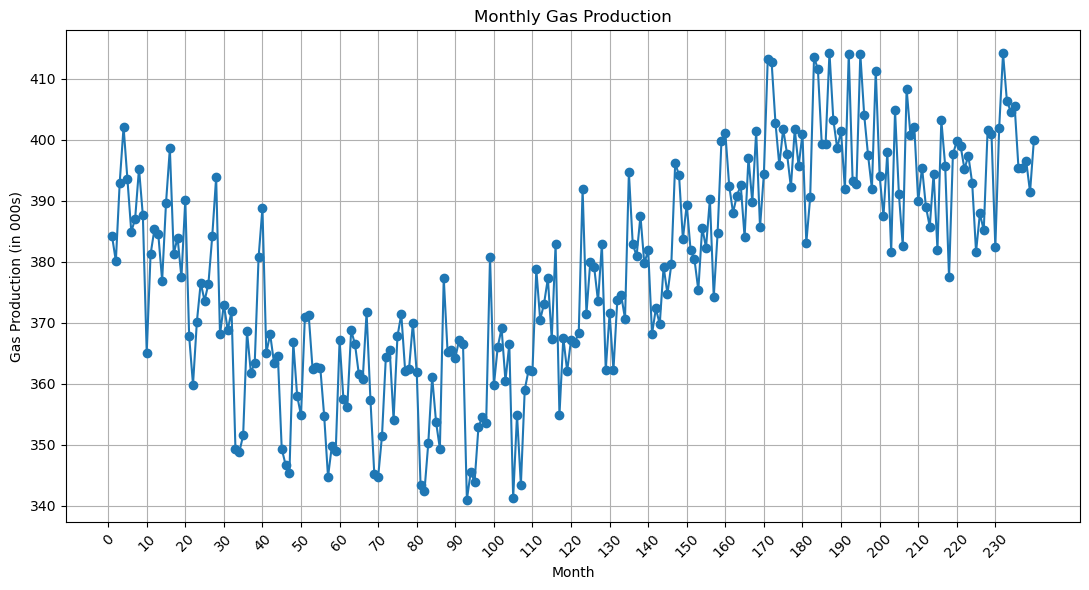

In [5]:
# Plotting
plt.figure(figsize=(11, 6))  # Adjust size if needed
plt.plot(df['Month'], df['Gas_prod'], marker='o', linestyle='-')

# Labeling the plot
plt.title('Monthly Gas Production')
plt.xlabel('Month')
plt.ylabel('Gas Production (in 000s)')

# Set x-axis ticks at intervals of 10
plt.xticks(np.arange(0, len(df['Month']), 10), rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Gas Production (in 000s)')

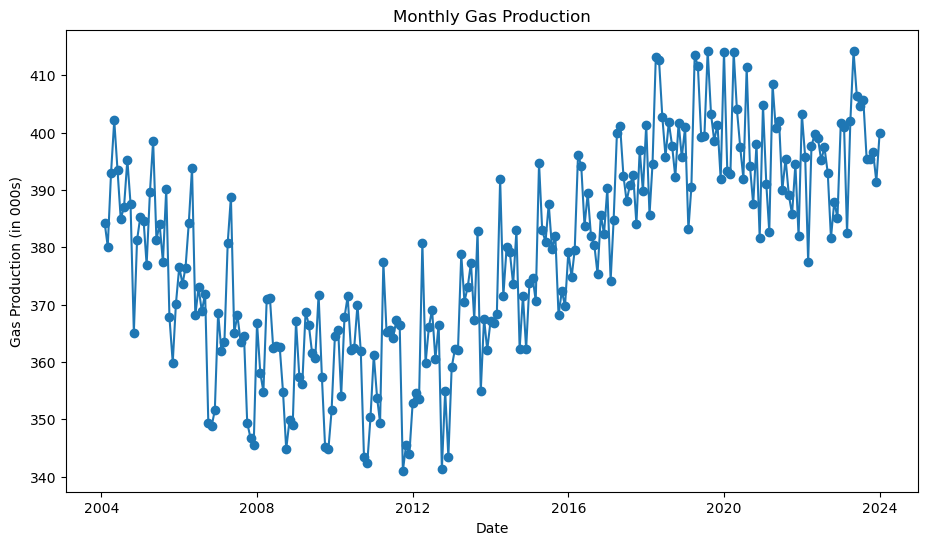

In [6]:
# Assume the sequence starts in January 2004 and ends in December 2023 (12 months x 20 years)
start_date = '2004-01'

# Generate a date range starting from the start_date, with a frequency of one month,
# and length equal to the dataset
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='M')

# Plotting
plt.figure(figsize=(11, 6))  # Adjust size if needed
plt.plot(df['Date'], df['Gas_prod'], marker='o', linestyle='-')

# Labeling the plot
plt.title('Monthly Gas Production')
plt.xlabel('Date')
plt.ylabel('Gas Production (in 000s)')


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
# Convert data to time series
gasprod_ts = pd.Series(df.Gas_prod.values, index=df.Date, name='Gas_prod')

In [9]:
# Define the number of validation months
nValid = 36

In [10]:
# Partition the time series into training and validation sets
nTrain = len(gasprod_ts) - nValid
train_ts = gasprod_ts[:nTrain]
valid_ts = gasprod_ts[nTrain:]

In [11]:
# Model 1: A linear trend time series model
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
ts_df = tsatools.add_trend(gasprod_ts,trend='ct')  # "ct" adds both constant and trend
ts_df['Month']=ts_df.index.month

# display updated ts_df
ts_df

,Gas_prod,const,trend,Month
Date,,,,
2004-01-31,384.261096,1.0,1.0,1
2004-02-29,380.107310,1.0,2.0,2
2004-03-31,392.967363,1.0,3.0,3
2004-04-30,402.114680,1.0,4.0,4
2004-05-31,393.519639,1.0,5.0,5
...,...,...,...,...
2023-08-31,395.379147,1.0,236.0,8
2023-09-30,395.330980,1.0,237.0,9
2023-10-31,396.520100,1.0,238.0,10


In [12]:
# partition data frame into training and validation to run regression
nValid = 36
nTrain = len(gasprod_ts) - nValid
train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]

In [13]:
# fit a linear regression model
gasprod_lm = sm.ols(formula='Gas_prod ~ trend',data=train_df).fit()

gasprod_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gas_prod   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     70.15
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           9.15e-15
Time:                        14:59:07   Log-Likelihood:                -845.41
No. Observations:                 204   AIC:                             1695.
Df Residuals:                     202   BIC:                             1701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    360.1673      2.155    167.108      0.000     355.918     364.417
trend          0.1527      0.018      8.376      0.000       0.117       0.189
==============================================================================
Omnibus:                        2.009   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.957
Skew:                           0.169   Prob(JB):                        0.376
Kurtosis:                       2.660   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Evaluate Linear Model performance
# ! pip install dmba

from dmba import regressionSummary
predict_lm = gasprod_lm.predict(valid_df)
regressionSummary(valid_ts,predict_lm)


Regression statistics

                      Mean Error (ME) : 1.1510
       Root Mean Squared Error (RMSE) : 8.2360
            Mean Absolute Error (MAE) : 6.7058
          Mean Percentage Error (MPE) : 0.2482
Mean Absolute Percentage Error (MAPE) : 1.6962


In [15]:
# Model with trend and seasonality
modelfomula = 'Gas_prod ~ trend + C(Month)'
gasprod_lm_trendseason = sm.ols(formula=modelfomula, data=train_df).fit()
gasprod_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gas_prod   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     12.80
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           4.81e-19
Time:                        14:59:08   Log-Likelihood:                -815.62
No. Observations:                 204   AIC:                             1657.
Df Residuals:                     191   BIC:                             1700.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        355.9528      3.661     97.229      0.000     348.732     363.174
C(Month)[T.2]     -0.1700      4.674     -0.036      0.971      -9.390       9.050
C(Month)[T.3]     17.7487      4.674      3.797      0.000       8.529      26.969
C(Month)[T.4]     14.6972      4.674      3.144      0.002       5.477      23.917
C(Month)[T.5]      6.8717      4.675      1.470      0.143      -2.349      16.092
C(Month)[T.6]      6.8390      4.675      1.463      0.145      -2.382      16.060
C(Month)[T.7]      7.3761      4.675      1.578      0.116      -1.846      16.598
C(Month)[T.8]      6.9371      4.676      1.484      0.140      -2.285      16.160
C(Month)[T.9]     -8.0353      4.676     -1.718      0.087     -17.259       1.188
C(Month)[T.10]    -4.6396      4.677     -0.992      0.322     -13.864       4.585
C(Month)[T.11]    -6.6322      4.677     -1.418      0.158     -15.858       2.593
C(Month)[T.12]     5.6568      4.678      1.209      0.228      -3.570      14.883
trend              0.1559      0.016      9.606      0.000       0.124       0.188
==============================================================================
Omnibus:                        8.889   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.621
Skew:                           0.455   Prob(JB):                       0.0134
Kurtosis:                       2.569   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Evaluate Seasonality Model performance
predict_lm_trendseason = gasprod_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts,predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : 0.7681
       Root Mean Squared Error (RMSE) : 6.1115
            Mean Absolute Error (MAE) : 5.2135
          Mean Percentage Error (MPE) : 0.1786
Mean Absolute Percentage Error (MAPE) : 1.3184


In [17]:
# Model with quadratic trend and seasonality
modelfomula = 'Gas_prod ~ trend + np.square(trend) + C(Month)'
gasprod_lm_trendseason = sm.ols(formula=modelfomula, data=train_df).fit()
gasprod_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gas_prod   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     68.90
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.35e-64
Time:                        14:59:10   Log-Likelihood:                -698.03
No. Observations:                 204   AIC:                             1424.
Df Residuals:                     190   BIC:                             1471.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          380.6398      2.395    158.952      0.000     375.916     385.363
C(Month)[T.2]       -0.1348      2.633     -0.051      0.959      -5.329       5.060
C(Month)[T.3]       17.8120      2.634      6.764      0.000      12.617      23.007
C(Month)[T.4]       14.7816      2.634      5.613      0.000       9.587      19.977
C(Month)[T.5]        6.9702      2.634      2.647      0.009       1.775      12.165
C(Month)[T.6]        6.9445      2.634      2.637      0.009       1.749      12.140
C(Month)[T.7]        7.4816      2.634      2.840      0.005       2.286      12.677
C(Month)[T.8]        7.0355      2.634      2.671      0.008       1.839      12.232
C(Month)[T.9]       -7.9509      2.634     -3.018      0.003     -13.148      -2.754
C(Month)[T.10]      -4.5763      2.635     -1.737      0.084      -9.773       0.621
C(Month)[T.11]      -6.5971      2.635     -2.504      0.013     -11.795      -1.399
C(Month)[T.12]       5.6568      2.635      2.146      0.033       0.458      10.855
trend               -0.5650      0.037    -15.401      0.000      -0.637      -0.493
np.square(trend)     0.0035      0.000     20.291      0.000       0.003       0.004
==============================================================================
Omnibus:                        1.515   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.321
Skew:                          -0.196   Prob(JB):                        0.517
Kurtosis:                       3.050   Cond. No.                     2.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Evaluate Model with Quadratic trend and seasonality performance
predict_lm_trendseason = gasprod_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts,predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -38.0559
       Root Mean Squared Error (RMSE) : 39.1968
            Mean Absolute Error (MAE) : 38.0559
          Mean Percentage Error (MPE) : -9.6359
Mean Absolute Percentage Error (MAPE) : 9.6359
